# Unit 1 Final
# Question: 
How does the amount of reviews for The Very Hungry Caterpillar by Eric Carle compare to other books that were on the best sellers list in 2015?
# Type of Study: 
The type of study that I will be conducting is an observational retrospective study. Since we're looking at a best selling list that contains best selling books from 2015, we're looking at preexisting data that was already created. We won't be changing the data in any way to conduct our study as well, so the study is observational retrospective. 
# Data Description: 
I will be examining the full population of books that were on the best selling list of 2015, and compare the reviews of those books with the reviews of The Very Hungry Caterpillar. The data I am using was collected through Amazon's best seller lists, and data that wasn't found in Amazon's best seller lists was collected from the GoodReads API. Some biases that could come with my data include the fact that Amazon and GoodReads don't fully account for all readers who have read bestselling books in 2015. The reviews that I am analyzing also only include reviews from people who have bought the book from Amazon or rated books on GoodReads, not taking into account reviews from other platforms.

Q1 (25th percentile): 4811.0
Q3 (75th percentile): 21112.75
IQR: 16301.75
Mean: 14233.38
Median: 9144.0
Mode: 6169
Minimum Reviews: 1873
Maximum Reviews: 79446


/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


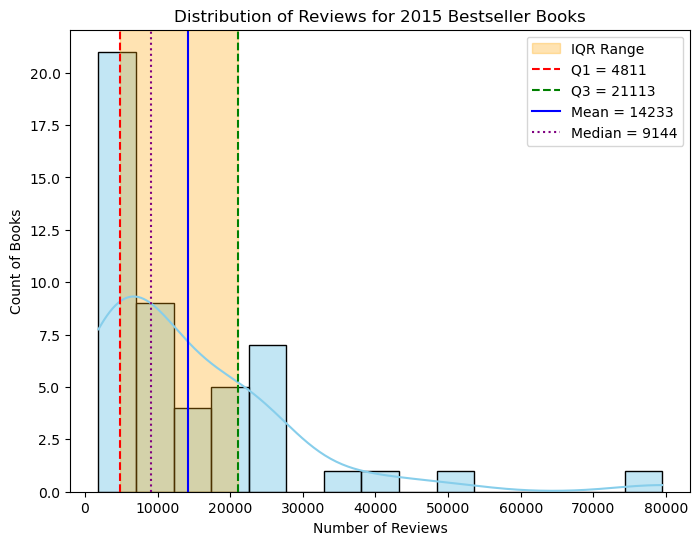

IQR: 16301.75
Standard Deviation: 14269.180421940064
Range: 77573


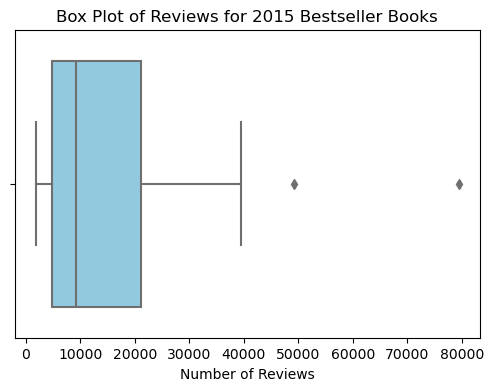


The Very Hungry Caterpillar Info:
                            Name      Author  User Rating  Reviews  Price  \
478  The Very Hungry Caterpillar  Eric Carle          4.9    19546      5   

     Year    Genre  
478  2015  Fiction  
'The Very Hungry Caterpillar' has 19546 reviews, which is at the 72.00th percentile among 2015 bestsellers.
Z-score for 'The Very Hungry Caterpillar': 0.37


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load dataset of bestseller books and reviews
df = pd.read_csv("Unit 1 Final/books.csv")  

# --- Filter to 2015 bestsellers ---
books_2015 = df[df["Year"] == 2015]  # only keep 2015 bestsellers

# --- Compute quartiles and IQR ---
q1 = books_2015["Reviews"].quantile(0.25)
q3 = books_2015["Reviews"].quantile(0.75)
iqr = q3 - q1
min_reviews = books_2015["Reviews"].min()
max_reviews = books_2015["Reviews"].max()

# --- Measures of central tendency ---
mean_reviews = books_2015["Reviews"].mean()
median_reviews = books_2015["Reviews"].median()
mode_reviews = books_2015["Reviews"].mode()[0]

print(f"Q1 (25th percentile): {q1}")
print(f"Q3 (75th percentile): {q3}")
print(f"IQR: {iqr}")
print(f"Mean: {mean_reviews}")
print(f"Median: {median_reviews}")
print(f"Mode: {mode_reviews}")
print(f"Minimum Reviews: {min_reviews}")
print(f"Maximum Reviews: {max_reviews}")

# --- Histogram with density curve ---
plt.figure(figsize=(8,6))
sns.histplot(books_2015["Reviews"], bins=15, kde=True, color="skyblue", edgecolor="black")

# Shade the IQR region
plt.axvspan(q1, q3, color="orange", alpha=0.3, label="IQR Range")

# Add lines for Q1, Q3, mean, median
plt.axvline(q1, color="red", linestyle="--", label=f"Q1 = {q1:.0f}")
plt.axvline(q3, color="green", linestyle="--", label=f"Q3 = {q3:.0f}")
plt.axvline(mean_reviews, color="blue", linestyle="-", label=f"Mean = {mean_reviews:.0f}")
plt.axvline(median_reviews, color="purple", linestyle=":", label=f"Median = {median_reviews:.0f}")

plt.xlabel("Number of Reviews")
plt.ylabel("Count of Books")
plt.title("Distribution of Reviews for 2015 Bestseller Books")
plt.legend()
plt.show()

# --- Measures of spread ---
std_dev = books_2015["Reviews"].std()
range_reviews = max_reviews - min_reviews

print(f"IQR: {iqr}")
print(f"Standard Deviation: {std_dev}")
print(f"Range: {range_reviews}")

# --- Box plot ---
plt.figure(figsize=(6,4))
sns.boxplot(x=books_2015["Reviews"], color="skyblue")
plt.title("Box Plot of Reviews for 2015 Bestseller Books")
plt.xlabel("Number of Reviews")
plt.show()

# --- Focus on The Very Hungry Caterpillar ---
vhc_info = books_2015[books_2015["Name"] == "The Very Hungry Caterpillar"]
vhc_reviews = vhc_info["Reviews"].values[0]

print("\nThe Very Hungry Caterpillar Info:")
print(vhc_info)

# Percentile rank for VHC
vhc_percentile = stats.percentileofscore(books_2015["Reviews"], vhc_reviews)
print(f"'{vhc_info['Name'].values[0]}' has {vhc_reviews} reviews, which is at the {vhc_percentile:.2f}th percentile among 2015 bestsellers.")

# Z-score for VHC
vhc_z = (vhc_reviews - mean_reviews) / std_dev
print(f"Z-score for '{vhc_info['Name'].values[0]}': {vhc_z:.2f}")

# Analysis:
The Very Hungry Caterpillar by Eric Carle got 19,546 reviews in 2015. This is higher than the mean and median number of reviews for bestseller books that year. It's in the interquartile range, but it's closer to quartile 3, which means its higher ranked. It's in the 72nd percentile, which means it had more reviews than 72% of books on the list. The z-score of 0.37 shows it's above average but not by that much, since the max is 79,446 reviews. In conclusion, The Very Hungry Caterpillar had an above-average review count, which shows us that it was a more popular book in 2015, even though it wasn't at the very top.